# CS229 Problem Set 2: Supervised Learning II

## Task1: Logistic regression: Training Stability

- Aimed at debugging machine learning algorithms

The first part of the code went wrong!

In [2]:
from __future__ import division
import numpy as np

try:
    xrange
except NameError:
    xrange = range

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def logistic_regression(X, Y, rate = 10):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = rate

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        if i % 10000 == 0:
            print(f"Finished {i} iterations with grad={grad}")
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
        if i > 2000000:
            print("After 2000000 iterations, the algorithm still not converge!")
            break
    return

print('==== Training model on data set A ====')
Xa, Ya = load_data('data_a.txt')
logistic_regression(Xa, Ya)

print('\n==== Training model on data set B ====')
Xb, Yb = load_data('data_b.txt')
logistic_regression(Xb, Yb)

==== Training model on data set A ====
Finished 10000 iterations with grad=[ 4.15154546e-08 -4.27822247e-08 -4.08456455e-08]
Finished 20000 iterations with grad=[ 3.06367605e-12 -3.15717618e-12 -3.01431651e-12]
Finished 30000 iterations with grad=[ 2.01423176e-16 -2.86463533e-16 -1.89141759e-16]
Converged in 30380 iterations

==== Training model on data set B ====
Finished 10000 iterations with grad=[ 0.00019399 -0.00019355 -0.00019461]
Finished 20000 iterations with grad=[ 0.00012541 -0.00012529 -0.0001257 ]
Finished 30000 iterations with grad=[ 9.60445104e-05 -9.60553587e-05 -9.61981110e-05]
Finished 40000 iterations with grad=[ 7.90651647e-05 -7.91523106e-05 -7.91443884e-05]
Finished 50000 iterations with grad=[ 6.78328688e-05 -6.79700947e-05 -6.78680755e-05]
Finished 60000 iterations with grad=[ 5.97905761e-05 -5.99622968e-05 -5.97981756e-05]
Finished 70000 iterations with grad=[ 5.37193268e-05 -5.39154728e-05 -5.37089335e-05]
Finished 80000 iterations with grad=[ 4.89573832e-05 -4

(a) For "data_a", the algorithm converged in 30380 iterations, but not converge with "data_b"

(b) Peeking at the gradient, it goes down very slowly with more iterations

(c)\
i. For learning rate, I think m=100 and rate=10 means $\alpha$ = 0.1, maybe that is not a good one? Try to shift the rate into 0.2 (rate = 20) \
NOT WORK

In [3]:
print('==== Training model on data set A ====')
Xa, Ya = load_data('data_a.txt')
logistic_regression(Xa, Ya, 20)

print('\n==== Training model on data set B ====')
Xb, Yb = load_data('data_b.txt')
logistic_regression(Xb, Yb, 20)

==== Training model on data set A ====
Finished 10000 iterations with grad=[ 2.28046560e-12 -2.35015732e-12 -2.24377780e-12]
Converged in 15389 iterations

==== Training model on data set B ====
Finished 10000 iterations with grad=[ 0.00012499 -0.00012488 -0.00012528]
Finished 20000 iterations with grad=[ 7.89255821e-05 -7.90133601e-05 -7.90042257e-05]
Finished 30000 iterations with grad=[ 5.97189140e-05 -5.98909354e-05 -5.97262845e-05]
Finished 40000 iterations with grad=[ 4.89132458e-05 -4.91270838e-05 -4.88907259e-05]
Finished 50000 iterations with grad=[ 4.19050009e-05 -4.21403740e-05 -4.18688337e-05]
Finished 60000 iterations with grad=[ 3.69529650e-05 -3.71986806e-05 -3.69105829e-05]
Finished 70000 iterations with grad=[ 3.32451560e-05 -3.34945103e-05 -3.32002969e-05]
Finished 80000 iterations with grad=[ 3.03499960e-05 -3.05987921e-05 -3.03046491e-05]
Finished 90000 iterations with grad=[ 2.80162822e-05 -2.82618445e-05 -2.79715356e-05]
Finished 100000 iterations with grad=[ 2.60

ii. Decrease the learning rate over time, multiply the rate with $\frac{1}{t^2}$ \
NOT WORK

In [4]:
def logistic_regression_t(X, Y, rate = 10):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = rate

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (1 / i*i) * (grad)
        if i % 10000 == 0:
            print(f"Finished {i} iterations with grad={grad}")
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
        if i > 2000000:
            print("After 2000000 iterations, the algorithm still not converge!")
            break
    return

print('==== Training model on data set A ====')
logistic_regression_t(Xa, Ya)

print('\n==== Training model on data set B ====')
logistic_regression_t(Xb, Yb)

==== Training model on data set A ====
Finished 10000 iterations with grad=[ 4.15154546e-08 -4.27822247e-08 -4.08456455e-08]
Finished 20000 iterations with grad=[ 3.06367605e-12 -3.15717618e-12 -3.01431651e-12]
Finished 30000 iterations with grad=[ 2.01423176e-16 -2.86463533e-16 -1.89141759e-16]
Converged in 30380 iterations

==== Training model on data set B ====
Finished 10000 iterations with grad=[ 0.00019399 -0.00019355 -0.00019461]
Finished 20000 iterations with grad=[ 0.00012541 -0.00012529 -0.0001257 ]
Finished 30000 iterations with grad=[ 9.60445104e-05 -9.60553587e-05 -9.61981110e-05]
Finished 40000 iterations with grad=[ 7.90651647e-05 -7.91523106e-05 -7.91443884e-05]
Finished 50000 iterations with grad=[ 6.78328688e-05 -6.79700947e-05 -6.78680755e-05]
Finished 60000 iterations with grad=[ 5.97905761e-05 -5.99622968e-05 -5.97981756e-05]
Finished 70000 iterations with grad=[ 5.37193268e-05 -5.39154728e-05 -5.37089335e-05]
Finished 80000 iterations with grad=[ 4.89573832e-05 -4

iii. Adding a regularization term $\|\theta\|_2^2$ to the loss function \
WORKS

In [5]:
def calc_grad_r(X, Y, theta, r = 0.01):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y)) + r * (1./m) * theta

    return grad

def logistic_regression_r(X, Y, rate = 10):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = rate

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad_r(X, Y, theta)
        theta = theta  - learning_rate * (grad) 
        if i % 10000 == 0:
            print(f"Finished {i} iterations with grad={grad}")
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
        if i > 2000000:
            print("After 2000000 iterations, the algorithm still not converge!")
            break
    return

print('==== Training model on data set A ====')
logistic_regression_r(Xa, Ya)

print('\n==== Training model on data set B ====')
logistic_regression_r(Xb, Yb)

==== Training model on data set A ====
Converged in 7229 iterations

==== Training model on data set B ====
Finished 10000 iterations with grad=[ 1.02673946e-15 -8.90997345e-16 -9.52363188e-16]
Converged in 10801 iterations


iv. Linear scaling of the input features \
NOT WORK, because it does not affect the calculation of gradient

In [6]:
def add_intercept_s(X_, scale = 10):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = scale * X_
    return X

def load_data_s(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept_s(X), Y

print('==== Training model on data set A ====')
Xa, Ya = load_data_s('data_a.txt')
logistic_regression(Xa, Ya)

print('\n==== Training model on data set B ====')
Xb, Yb = load_data_s('data_b.txt')
logistic_regression(Xb, Yb)

==== Training model on data set A ====
Finished 10000 iterations with grad=[-0.09106724 -0.36539725 -0.55611922]
Finished 20000 iterations with grad=[-0.08232607 -0.33781042 -0.48451258]
Finished 30000 iterations with grad=[-0.0824997  -0.30831575 -0.52215135]
Finished 40000 iterations with grad=[-0.10718074 -0.45478757 -0.64377839]
Finished 50000 iterations with grad=[-0.08259839 -0.32095127 -0.50800366]
Finished 60000 iterations with grad=[-0.10739315 -0.45600711 -0.64489189]
Finished 70000 iterations with grad=[-0.09068532 -0.3515836  -0.56798646]
Finished 80000 iterations with grad=[-0.09891643 -0.40400647 -0.60457759]
Finished 90000 iterations with grad=[-0.0787289  -0.3179119  -0.46540736]
Finished 100000 iterations with grad=[-0.07879712 -0.3184274  -0.46559362]
Finished 110000 iterations with grad=[-0.08427112 -0.34291669 -0.5016497 ]
Finished 120000 iterations with grad=[-0.08971974 -0.35398147 -0.55346373]
Finished 130000 iterations with grad=[-0.09152527 -0.35806073 -0.57026

KeyboardInterrupt: 

v. Add zero-mean Gaussion noise to the training data \
WORKS!!

In [11]:
def load_data_g(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]

    noise_matrix_x = np.random.normal(0, 0.1, X.shape)
    return add_intercept(X + noise_matrix_x), Y

print('==== Training model on data set A ====')
Xa, Ya = load_data_g('data_a.txt')
logistic_regression(Xa, Ya)

print('\n==== Training model on data set B ====')
Xb, Yb = load_data_g('data_b.txt')
logistic_regression(Xb, Yb)

==== Training model on data set A ====
Converged in 8150 iterations

==== Training model on data set B ====
Finished 10000 iterations with grad=[ 1.03784736e-11 -9.55528430e-12 -1.12971925e-11]
Converged in 16338 iterations


(d) Are SVM vulnerable to datasets like b? \
First we visualize the datasets

In [13]:
import matplotlib.pyplot as plt

def visualize(filename):
    data = np.loadtxt(filename)

    data_neg = data[data[:, 0] == -1]
    data_pos = data[data[:, 0] == 1]

    plt.scatter(data_neg[:, 1], data_neg[:, 2], color="red", marker="o", label="-1")
    plt.scatter(data_pos[:, 1], data_pos[:, 2], color="blue", marker="s", label="1")

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

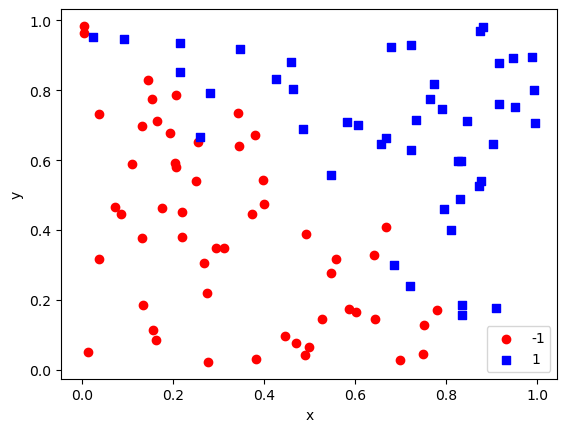

In [14]:
visualize("data_a.txt")

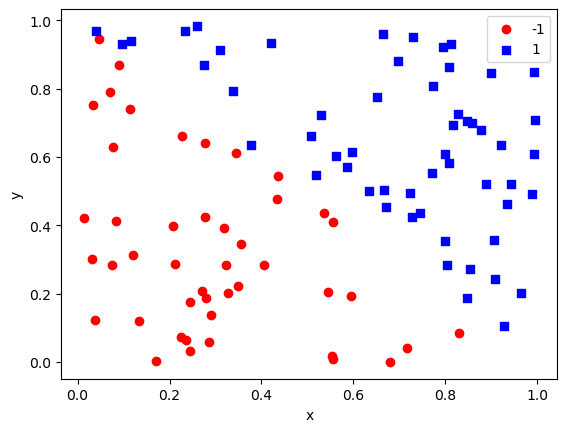

In [15]:
visualize("data_b.txt")

Notice that data_a is linearly inseparable but data_b is linearly separable, so when we train logistic regression, the decision boundary keeps moving inside the "gap" but converge with data_a. But when we train SVM, the boundary should be only a definitive one 